In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.DataFrame({
    'x': [2.1,1.6,1.9,1.7,1.4,1.2,1.3,1.1,2.3,1.4],
     'y':[10.6,7.7,8.6,7.6,7.8,5.9,7.2,5.4,9.6,5.6]
}

)
df

,x,y
0,2.1,10.6
1,1.6,7.7
2,1.9,8.6
3,1.7,7.6
4,1.4,7.8
5,1.2,5.9
6,1.3,7.2
7,1.1,5.4
8,2.3,9.6
9,1.4,5.6


In [3]:
inp = ['x']
x = df[inp]
target = 'y'
y= df[target]

In [4]:
model = LinearRegression()
model

LinearRegression()

In [5]:
model.fit(x,y)

LinearRegression()

In [6]:
model.intercept_

1.447887323943661

In [7]:
model.coef_[0]

3.845070422535211

In [8]:
model.score(x,y)

0.8093324790687068

In [9]:
yh=model.predict(x)

In [10]:
1-( (len(df)-1)/(len(df)-1-1))*(1-model.score(x,y))

0.7854990389522951

In [11]:
print(mean_squared_error(y,yh))
print(mean_absolute_error(y,yh))

0.4945915492957746
0.5799999999999995


In [12]:
import math
math.sqrt(mean_squared_error(y,yh))

0.7032720307930457

In [13]:
from statsmodels.tools.tools import add_constant
x_sm=add_constant(df['x'])
x_sm

,const,x
0,1.0,2.1
1,1.0,1.6
2,1.0,1.9
3,1.0,1.7
4,1.0,1.4
5,1.0,1.2
6,1.0,1.3
7,1.0,1.1
8,1.0,2.3
9,1.0,1.4


In [14]:
df

,x,y
0,2.1,10.6
1,1.6,7.7
2,1.9,8.6
3,1.7,7.6
4,1.4,7.8
5,1.2,5.9
6,1.3,7.2
7,1.1,5.4
8,2.3,9.6
9,1.4,5.6


In [15]:
x_sm= sm.add_constant(x)
print(x_sm)
model1= smf.ols(formula= 'y  ~  x',data=df).fit()
model1.summary()


# model = smf.ols(formula='Head_size ~ Brain_weight', data=df).fit()

   const    x
0    1.0  2.1
1    1.0  1.6
2    1.0  1.9
3    1.0  1.7
4    1.0  1.4
5    1.0  1.2
6    1.0  1.3
7    1.0  1.1
8    1.0  2.3
9    1.0  1.4


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     33.96
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000393
Time:                        23:14:32   Log-Likelihood:                -10.669
No. Observations:                  10   AIC:                             25.34
Df Residuals:                       8   BIC:                             25.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4479      1.085      1.335      0.219      -1.053       3.949
x              3.8451      0.660      5.827      0.000       2.323       5.367
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.360
Skew:                           0.088   Prob(JB):                        0.835
Kurtosis:                       2.087   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

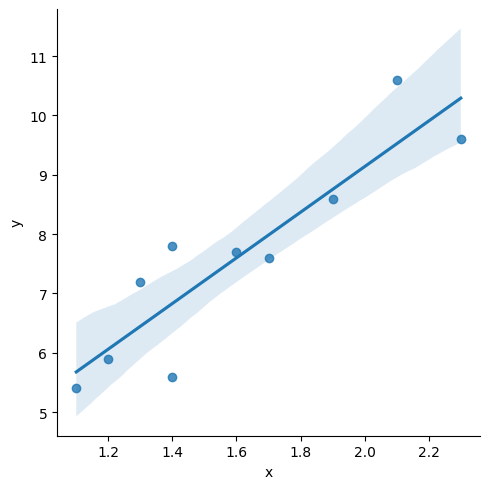

In [16]:
import seaborn as sns
sns.lmplot(x ='x', y ='y', data = df);

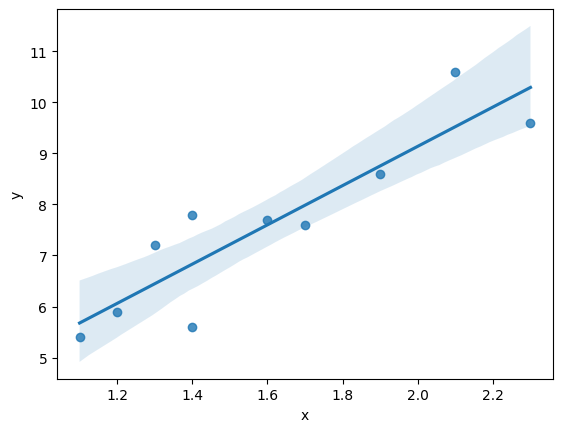

In [17]:
sns.regplot(x = "x",
            y = "y",
            data = df);

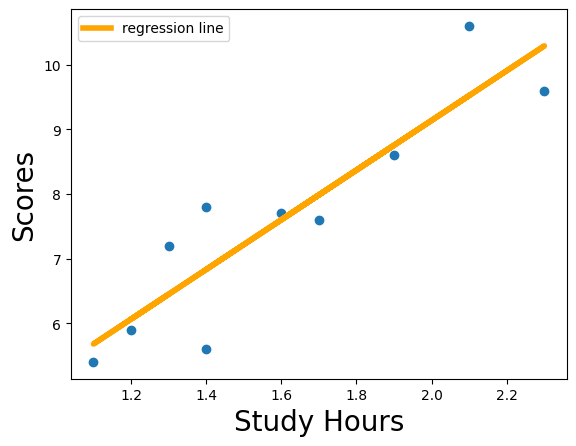

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,model.intercept_ + model.coef_ * x,lw=4,c="orange",label="regression line")
plt.xlabel("Study Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.legend()
plt.show();